In [1]:
%matplotlib inline

import sys
sys.path.append("..")

from any_angle.anya.api import Anya
from any_angle._2k_astar.api import (create_canonical_algo_with_euclidean_heuristics, 
                                     create_2k_astar_algo_with_euclidean_heuristics)
from any_angle.theta.api import ThetaAPWithEuclideanHeuristics
from any_angle.common.draw import draw_static_if_path_found

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

// just to show all output without scrolling (this cell may be skipped)

<IPython.core.display.Javascript object>

In [3]:
height = 15
width = 30
map_str = '''
.....................@@.......
.....................@@.......
.....................@@.......
.....................@@.......
.............@@......@@.......
...@@........@@......@@@@@....
...@@........@@......@@@@@....
...@@........@@......@@.......
...@@........@@......@@.@@@@@@
...@@........@@......@@.@@@@@@
...@@........@@......@@.@@@@@@
...@@........@@...............
.............@@...............
.............@@...............
..............................
'''

start = (1, 1)
goal = (1, 25)

algorithms = {
    "2^k A*, k=3": create_2k_astar_algo_with_euclidean_heuristics(3),
    "2^k A*, k=6": create_2k_astar_algo_with_euclidean_heuristics(6),
    "Canonical 2^k A*, k=3": create_canonical_algo_with_euclidean_heuristics(3),
    "Canonical 2^k A*, k=6": create_canonical_algo_with_euclidean_heuristics(6),
    "Theta": ThetaAPWithEuclideanHeuristics(),
    "Anya": Anya()
}


------
2^k A*, k=3
------
Found path length: 38.97056274847714


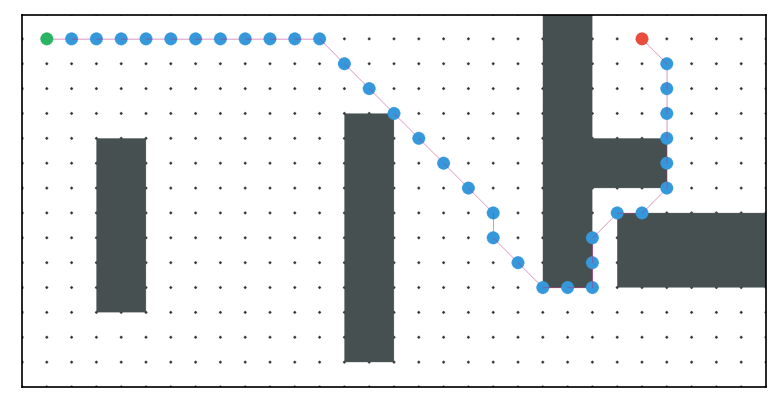


------
2^k A*, k=6
------
Found path length: 37.1334088272581


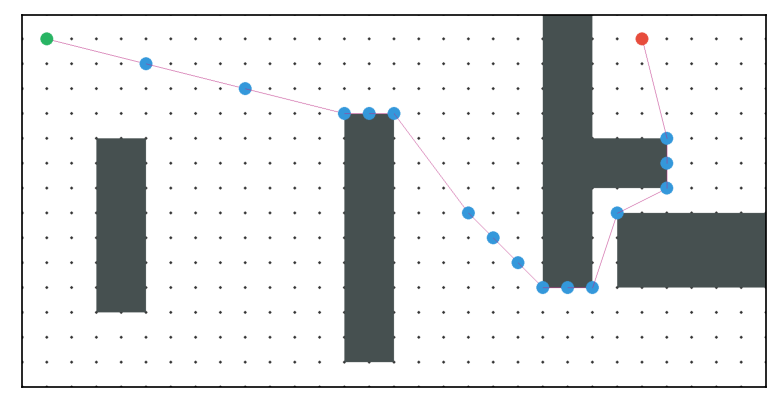


------
Canonical 2^k A*, k=3
------
Found path length: 38.97056274847714


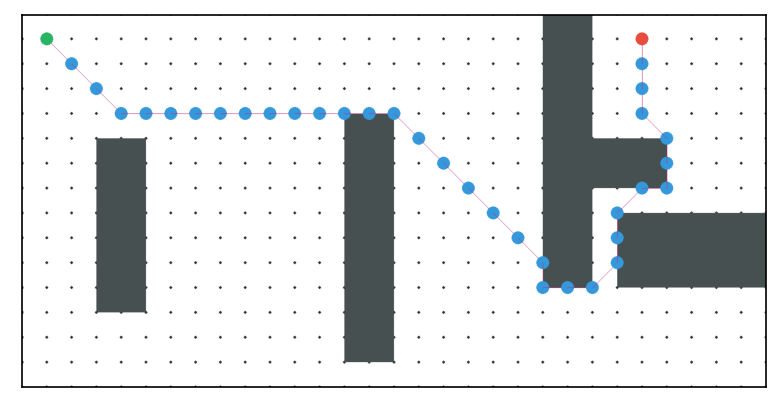


------
Canonical 2^k A*, k=6
------
Found path length: 37.1334088272581


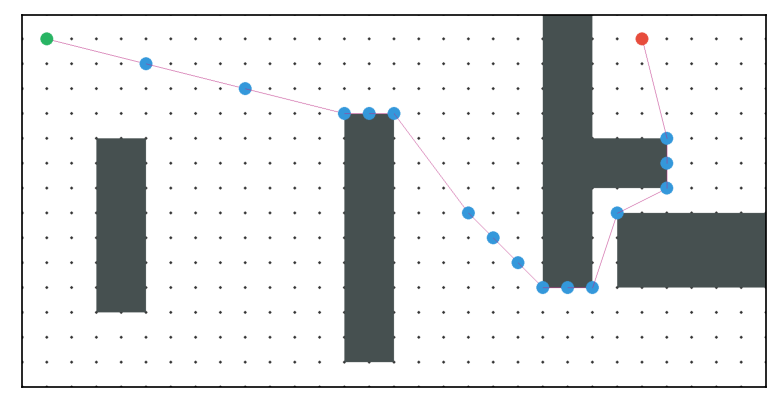


------
Theta
------
Found path length: 37.18293185399439


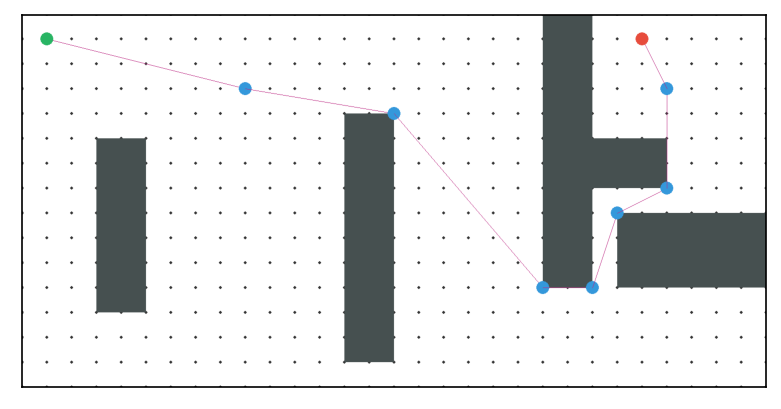


------
Anya
------
Found path length: 37.05881678385507


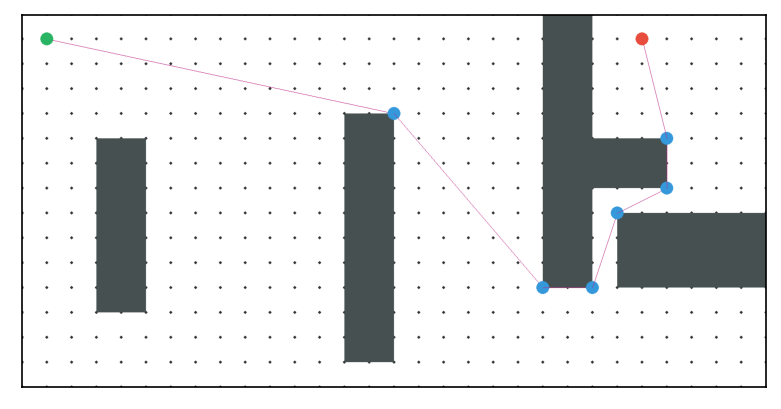

In [4]:
for algo in algorithms:
    map_ = algorithms[algo].read_map(map_str, width, height)
    stats = algorithms[algo].compute_path_from_map(map_, start, goal)
    print(f"\n------\n{algo}\n------")
    if stats.path_found:
        print(f"Found path length: {stats.way_length}")
    draw_static_if_path_found(map_, start, goal, stats)
    